# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
zillow_df = pd.read_csv("zillow_data.csv")
pd.set_option('display.max_columns', 500)
zillow_df#['RegionName'].unique()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [3]:
def get_datetimes(df_column):
    return pd.to_datetime(df_column, format='%Y-%m')

# Step 2: Data Preprocessing

In [4]:
with pd.option_context("display.max_rows", 1000):
    display(zillow_df.isna().sum())

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
1998-03       1036
1998-04       1036
1998-05       1036
1998-06       1036
1998-07       1036
1998-08       1036
1998-09       1036
1998-10       1036
1998-11       1036
1998-12       1036
1999-01       1036
1999-02       1036
1999-03       1036
1999-04       1036
1999-05       1036
1999-06       1036
1999-07       1036
1999-08       1036
1999-09       1036
1999-10       1036
1999-11       1036
1999-12       1036
2000-01     

In [5]:
zillow_df = zillow_df.dropna()

with pd.option_context("display.max_rows", 1000):
    display(zillow_df.isna().sum())

RegionID      0
RegionName    0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
1996-04       0
1996-05       0
1996-06       0
1996-07       0
1996-08       0
1996-09       0
1996-10       0
1996-11       0
1996-12       0
1997-01       0
1997-02       0
1997-03       0
1997-04       0
1997-05       0
1997-06       0
1997-07       0
1997-08       0
1997-09       0
1997-10       0
1997-11       0
1997-12       0
1998-01       0
1998-02       0
1998-03       0
1998-04       0
1998-05       0
1998-06       0
1998-07       0
1998-08       0
1998-09       0
1998-10       0
1998-11       0
1998-12       0
1999-01       0
1999-02       0
1999-03       0
1999-04       0
1999-05       0
1999-06       0
1999-07       0
1999-08       0
1999-09       0
1999-10       0
1999-11       0
1999-12       0
2000-01       0
2000-02       0
2000-03       0
2000-04       0
2000-05       0
2000-06       0
2000-07       0
2000-08       0
2000-09       0
2000-10       0
2000-11 

In [6]:
zillow_df.shape

(12895, 272)

In [7]:
zillow_df.RegionID = zillow_df.RegionID.astype(str)
zillow_df.RegionName = zillow_df.RegionName.astype(str)

/home/james/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


# Step 3: Extract Top 5 Zipcodes

## 3.1 Get top 5 zips

In [8]:
date_cols = zillow_df.iloc[:,7:-1]
date_cols.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
0,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,787900.0,794100.0,798900.0,802300.0,806100.0,810900.0,817400.0,826800.0,837900.0,848100.0,853800.0,8567

### 3.1.1 Define what constitutes top 5

In [9]:
def get_CAGR(df):
    #balances
    bb = zillow_df.iloc[:,7].values #beginning balance
    eb = zillow_df.iloc[:,-1].values #ending balance
    
    bb_column = zillow_df.columns[7]
    eb_column = zillow_df.columns[-1]
    
    #time
    time_delta = get_datetimes(eb_column) - get_datetimes(bb_column)
    time_delta_yrs = time_delta.days/365
    n = time_delta_yrs
    
    #formula    
    cagr_1 = eb/bb
    cagr_2 = cagr_1**(1/n)
    cagr_final = cagr_2 -1
    
    return cagr_final
    
cagrs = get_CAGR(zillow_df)
cagrs

zillow_df['CAGR'] = cagrs
zillow_df

/home/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,CAGR
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,7806

In [10]:
zillow_df['std'] = date_cols.std(axis=1)
zillow_df['CAGR/std'] = zillow_df['CAGR'] / zillow_df['std']

zillow_df_sorted = zillow_df.sort_values(['CAGR/std'], ascending=False)
top_5_zipcodes_df = zillow_df_sorted.iloc[0:5,:]

top_5_zipcodes_df

/home/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,CAGR,std,CAGR/std
13186,90356,74339,Commerce,OK,Miami,Ottawa,13187,16300.0,16400.0,16400.0,16500.0,16500.0,16500.0,16600.0,16600.0,16600.0,16700.0,16800.0,16900.0,17000.0,17100.0,17300.0,17400.0,17600.0,17800.0,18000.0,18100.0,18300.0,18500.0,18700.0,19000.0,19300.0,19500.0,19800.0,20100.0,20400.0,20600.0,20800.0,21000.0,21200.0,21500.0,21600.0,21800.0,22000.0,22100.0,22300.0,22400.0,22400.0,22500.0,22500.0,22500.0,22500.0,22500.0,22500.0,22600.0,22700.0,22700.0,22800.0,22900.0,22900.0,23000.0,23000.0,23000.0,23100.0,23200.0,23200.0,23300.0,23400.0,23400.0,23500.0,23600.0,23600.0,23700.0,23700.0,23600.0,23600.0,23600.0,23600.0,23700.0,23700.0,23800.0,23800.0,23900.0,23900.0,24000.0,24000.0,24000.0,23900.0,23800.0,23700.0,23600.0,23600.0,23600.0,23400.0,23300.0,23100.0,22800.0,22600.0,22500.0,22500.0,22400.0,22400.0,22300.0,22300.0,22300.0,22300.0,22300.0,22300.0,22300.0,22400.0,22600.0,23000.0,23500.0,23800.0,23900.0,23900.0,23900.0,24100.0,24500.0,25000.0,25400.0,25800.0,26100.0,26300.0,26400.0,26500.0,26600.0,26700.0,26800.0,26800.0,26800.0,26700.0,26600.0,26600.0,26600.0,26600.0,26600.0,26700.0,26900.0,27000.0,27200.0,27200.0,27300.0,27400.0,27700.0,28100.0,28400.0,28600.0,28700.0,28700.0,28600.0,28500.0,28400.0,28400.0,28300.0,28100.0,27800.0,27600.0,27400.0,27100.0,26900.0,26700.0,26400.0,26100.0,25900.0,25800.0,25700.0,25600.0,25500.0,25300.0,25100.0,25000.0,24900.0,24800.0,25000.0,25400.0,25400.0,25300.0,25500.0,25700.0,25500.0,25100.0,25000.0,24800.0,24600.0,24200.0,23800.0,23500.0,23500.0,23500.0,23200.0,22900.0,22800.0,22900.0,22800.0,22800.0,22700.0,22700.0,22700.0,22800.0,22700.0,22600.0,22700.0,22700.0,22700.0,22700.0,22900.0,23100.0,23200.0,23400.0,23700.0,23800.0,23900.0,23900.0,23900.0,24000.0,23800.0,23600.0,23300.0,23300.0,23200.0,23200.0,23100.0,23000.0,22900.0,22900.0,227

# Step 4: Reshape from Wide to Long Format

In [11]:
def melt_data(df, values):
    melted = pd.melt(df, id_vars=['RegionName','City','State','Metro','CountyName','RegionID','SizeRank'], value_vars = values, var_name ='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    #melted = melted.dropna(subset=['value'])
    return melted#.groupby('time').aggregate({'value':'mean'})

In [12]:
date_columns = list(zillow_df.columns[7:-3])
date_columns

['1996-04',
 '1996-05',
 '1996-06',
 '1996-07',
 '1996-08',
 '1996-09',
 '1996-10',
 '1996-11',
 '1996-12',
 '1997-01',
 '1997-02',
 '1997-03',
 '1997-04',
 '1997-05',
 '1997-06',
 '1997-07',
 '1997-08',
 '1997-09',
 '1997-10',
 '1997-11',
 '1997-12',
 '1998-01',
 '1998-02',
 '1998-03',
 '1998-04',
 '1998-05',
 '1998-06',
 '1998-07',
 '1998-08',
 '1998-09',
 '1998-10',
 '1998-11',
 '1998-12',
 '1999-01',
 '1999-02',
 '1999-03',
 '1999-04',
 '1999-05',
 '1999-06',
 '1999-07',
 '1999-08',
 '1999-09',
 '1999-10',
 '1999-11',
 '1999-12',
 '2000-01',
 '2000-02',
 '2000-03',
 '2000-04',
 '2000-05',
 '2000-06',
 '2000-07',
 '2000-08',
 '2000-09',
 '2000-10',
 '2000-11',
 '2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2002-08',
 '2002-09',
 '2002-10',
 '2002-11',
 '2002-12',
 '2003-01',
 '2003-02',
 '20

In [13]:
top5_zipcodes_df_melted = melt_data(top_5_zipcodes_df,date_columns)
#zillow_df
top5_zipcodes_df_melted = top5_zipcodes_df_melted.rename(index=str, columns={"value": "price"})

top5_zipcodes_df_melted#.head()

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,time,price
0,74339,Commerce,OK,Miami,Ottawa,90356,13187,1996-04-01,16300.0
1,73438,Healdton,OK,Ardmore,Carter,90018,12168,1996-04-01,18300.0
2,74030,Drumright,OK,Tulsa,Creek,90242,11896,1996-04-01,18900.0
3,73129,Oklahoma City,OK,Oklahoma City,Oklahoma,89954,6279,1996-04-01,14900.0
4,74110,Tulsa,OK,Tulsa,Tulsa,90300,7243,1996-04-01,17300.0
5,74339,Commerce,OK,Miami,Ottawa,90356,13187,1996-05-01,16400.0
6,73438,Healdton,OK,Ardmore,Carter,90018,12168,1996-05-01,18400.0
7,74030,Drumright,OK,Tulsa,Creek,90242,11896,1996-05-01,18900.0
8,73129,Oklahoma City,OK,Oklahoma City,Oklahoma,89954,6279,1996-05-01,15000.0
9,74110,Tulsa,OK,Tulsa,Tulsa,90300,7243,1996-05-01,17300.0


# Step 5: EDA and Visualization

In [14]:
def get_df_at_zipcode(zipcode):
    zipcode_df = top5_zipcodes_df_melted[top5_zipcodes_df_melted['RegionName']==zipcode]
    zipcode_timePrice = zipcode_df.iloc[:,-2:]
    zipcode_timePrice = zipcode_timePrice.set_index('time')
    
    return zipcode_timePrice#.plot()

def visualize(zipcode):
    zipcode_df = get_df_at_zipcode(zipcode)   
    
    #Plot simple time series
    plt.figure(figsize=(16,12))
    plt.subplot(221)
    plt.plot(zipcode_df)
    plt.title(f'{zipcode} zipcode: median housing prices over time')
    
    
    plt.subplot(222)
    rolmean = zipcode_df.rolling(window = 8, center = False).mean()
    rolstd = zipcode_df.rolling(window = 8, center = False).std()

    #Visualize stationarity check
    orig = plt.plot(zipcode_df, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title(f'{zipcode} zipcode: checking stationarity ')
    plt.show();

In [15]:
unique_zipcodes = list(top5_zipcodes_df_melted['RegionName'].unique())
unique_zipcodes

['74339', '73438', '74030', '73129', '74110']

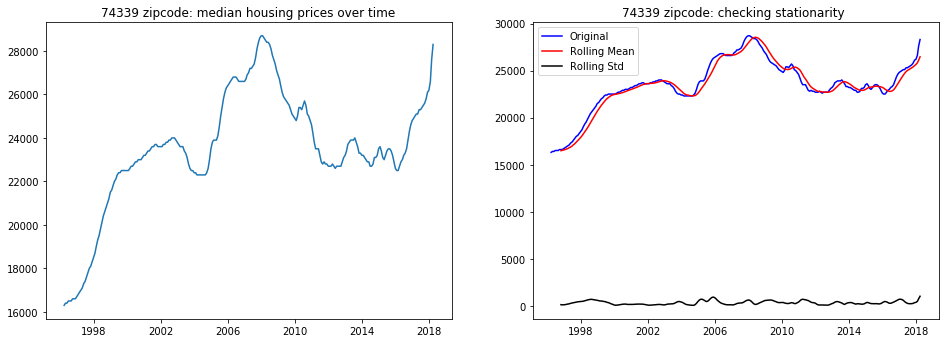

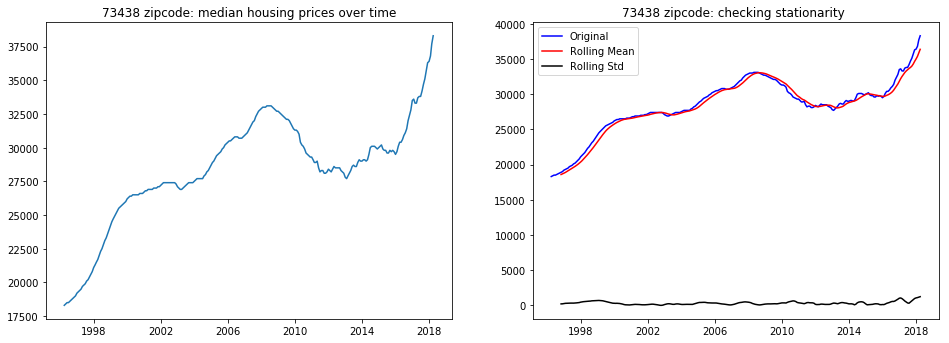

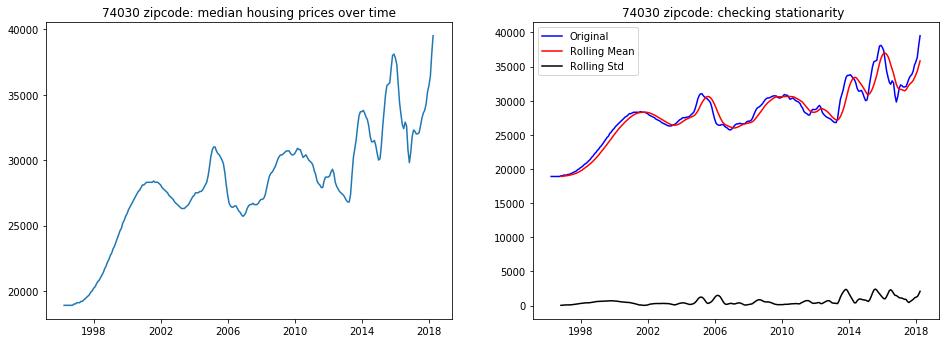

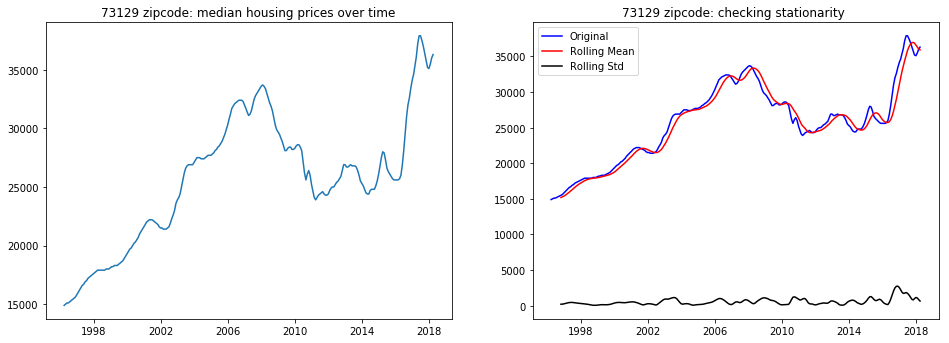

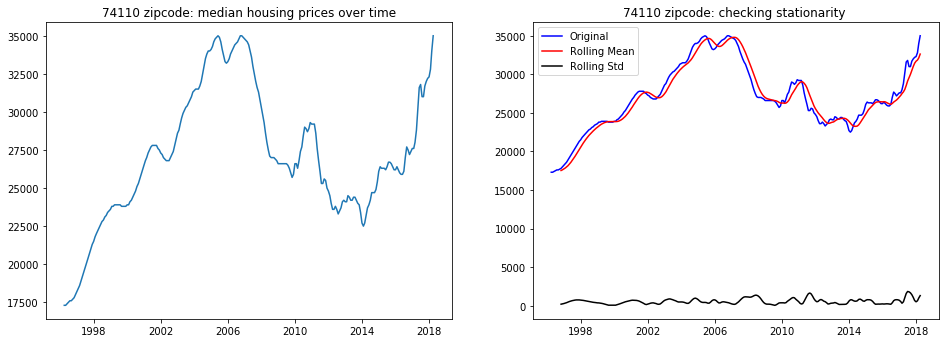

In [16]:
for u in unique_zipcodes:
    visualize(u)

From the visualizations above, we can see that for each of our top 5 zipcodes the mean of the data does not appear constant over time, meaning our time series do not appear stationary. The variations in the mean could, however, be a product of randomness. To determine whether the roling mean has statistically significant variation across time we will our data through the Dickey Fuller statistical test.

In [17]:
def df_test(zipcode):
    zipcode_df = get_df_at_zipcode(zipcode)
    dftest = adfuller(zipcode_df['price'].values)

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(f'---Dickey Fuller Test for pricing data of zipcode {zipcode}---')
    print(dfoutput)
    print('    ')
    

    
for u in unique_zipcodes:
    df_test(u)

---Dickey Fuller Test for pricing data of zipcode 74339---
Test Statistic                  -1.895619
p-value                          0.334125
#Lags Used                       4.000000
Number of Observations Used    260.000000
Critical Value (1%)             -3.455754
Critical Value (5%)             -2.872721
Critical Value (10%)            -2.572728
dtype: float64
    
---Dickey Fuller Test for pricing data of zipcode 73438---
Test Statistic                  -0.389637
p-value                          0.911815
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64
    
---Dickey Fuller Test for pricing data of zipcode 74030---
Test Statistic                  -1.157861
p-value                          0.691455
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)        

In each of our tests, the Test Statistic is greater than our critical values, meaning the data is stationary.

In [18]:
def get_rolling_mean_at_zip(zipcode):
    rolling_zip_df = get_df_at_zipcode(zipcode).rolling(window=5,center=False).mean()
    rolling_zip_df.dropna(inplace=True)
    return rolling_zip_df

In [19]:
rolling_zip_74439_df = get_rolling_mean_at_zip('74339')
rolling_zip_73438_df = get_rolling_mean_at_zip('73438')
rolling_zip_74030_df = get_rolling_mean_at_zip('74030')
rolling_zip_73129_df = get_rolling_mean_at_zip('73129')
rolling_zip_74110_df = get_rolling_mean_at_zip('74110')

In [20]:
sub_rollingMean_74339 = get_df_at_zipcode('74339') - rolling_zip_74439_df
sub_rollingMean_74339 = sub_rollingMean_74339.dropna()
sub_rollingMean_74339_diff = sub_rollingMean_74339.diff(periods=10).dropna()

sub_rollingMean_73438 = get_df_at_zipcode('73438') - rolling_zip_73438_df
sub_rollingMean_73438 = sub_rollingMean_73438.dropna()
sub_rollingMean_73438_diff = sub_rollingMean_73438.diff(periods=10).dropna()

sub_rollingMean_74030 = get_df_at_zipcode('74030') - rolling_zip_74030_df
sub_rollingMean_74030 = sub_rollingMean_74030.dropna()
sub_rollingMean_74030_diff = sub_rollingMean_74030.diff(periods=10).dropna()

sub_rollingMean_73129 = get_df_at_zipcode('73129') - rolling_zip_73129_df
sub_rollingMean_73129 = sub_rollingMean_73129.dropna()
sub_rollingMean_73129_diff = sub_rollingMean_73129.diff(periods=10).dropna()

sub_rollingMean_74110 = get_df_at_zipcode('74110') - rolling_zip_74110_df
sub_rollingMean_74110 = sub_rollingMean_74110.dropna()
sub_rollingMean_74110_diff = sub_rollingMean_74110.diff(periods=10).dropna()


dftest_74339 = adfuller(sub_rollingMean_74339_diff.price)
dftest_73438 = adfuller(sub_rollingMean_73438_diff.price)
dftest_74030 = adfuller(sub_rollingMean_74030_diff.price)
dftest_73129 = adfuller(sub_rollingMean_73129_diff.price)
dftest_74110 = adfuller(sub_rollingMean_74110_diff.price)

In [21]:
print(dftest_74339)
print(dftest_73438)
print(dftest_74030)
print(dftest_73129)
print(dftest_74110)

(-3.6454572913727823, 0.004949141707730139, 12, 238, {'1%': -3.458128284586202, '5%': -2.873761835239286, '10%': -2.5732834559706235}, 2890.7956814864738)
(-3.4314002261319017, 0.009933894215856583, 13, 237, {'1%': -3.4582467982399105, '5%': -2.8738137461081323, '10%': -2.5733111490323846}, 2881.2427991392874)
(-4.331080776858862, 0.0003922680271691386, 16, 234, {'1%': -3.4586084859607156, '5%': -2.873972159235721, '10%': -2.57339565928848}, 3181.655942054214)
(-4.402859138440403, 0.0002933932710000084, 16, 234, {'1%': -3.4586084859607156, '5%': -2.873972159235721, '10%': -2.57339565928848}, 3013.8198428814203)
(-4.469166326313397, 0.00022346537564353028, 16, 234, {'1%': -3.4586084859607156, '5%': -2.873972159235721, '10%': -2.57339565928848}, 3110.1946643407696)


# Step 5: ARIMA Modeling

In [22]:
def fit_model(df, zipcode, show_graph=True):
    # Get only the values from the dataframe
    vals = df.price.values
    # Split the data into training and testing sets by holding out dates past a certain point. Below, we use index 261 for
    # this split
    train = vals[:261]
    test = vals[261:]
    # Use a list comprehension to create a "history" list using our training data values
    history = [i for i in train]
    # initialize an empty list for predictions
    preds = []
    # loop through a list the length of our training set
    
    for i in range(len(test)):
        # create an ARIMA model and pass in our history list. Also set `order=(0,1,1)` (order refers to AR and MA params--
        # see statsmodels documentation for ARIMA for more details)
        model = ARIMA(history, order=(0,1,1))
        # Fit the model we just created
        fitted_model = model.fit(disp=0)
        print(fitted_model)
        
        # Get the forecast of the next value from our fitted model, and grab the first value to use as our 'y-hat' prediction
        output = fitted_model.forecast()
        y_hat = output[0]
        # append y_hat to our list of predictions
        preds.append(y_hat)
        obs = test[i]
        # Get the actual ground truth value for this datetime and append it to the history array
        history.append(obs)
    # get the forecast for the next three years (1 month==1 timestep in our data)
    future_preds = fitted_model.forecast(steps=36)[0]
    # Visualize the ARIMA model's predictions vs the actual ground truth values for our test set
    if show_graph == True:
        print('Predicted: {} \t Expected: {}'.format(y_hat, obs))
        # Also calculate the MSE
        mse = mean_squared_error(test, preds)
        print("MSE for Test Set: {}".format(mse))
        plt.plot(test)
        plt.plot(preds, color='r')
        plt.ylabel('Median Home Value ($)')
        plt.title('Predicted vs Expected Median Home Sale Values'.format(zipcode))
        plt.legend(['Actual', 'Predicted'])
        plt.show()
        plt.figure()
        plt.plot(future_preds)
        plt.ylabel('Median Home Value ($)')
        plt.title('Predicted Home Value, {}, Next 36 Months'.format(zipcode))
        plt.show()
        get_results(df, future_preds, zipcode)
    return future_preds

In [23]:
def get_results(df, preds, name):
    if 'pandas.core.frame.DataFrame' in str(type(df)):
        current_price = df.iloc[-1].value
    else:
        current_price = df[-1]
    year_later = preds[11]
    year_3_val = preds[35]
    year_5_val = preds[-1]
    print("Current Avg Median Home Value in {}: ${:.2f}".format(name, current_price))
    print("Predicted Avg Median Home Value for {} in April 2019: ${:.2f}".format(name, year_later))
    expected_appreciation_value_1 = year_later - current_price
    expected_appreciation_percent_1 = expected_appreciation_value_1 / current_price
    expected_appreciation_value_3 = year_3_val - current_price
    expected_appreciation_percent_3 = expected_appreciation_value_3 / current_price
    expected_appreciation_value_5 = year_5_val - current_price
    expected_appreciation_percent_5 = expected_appreciation_value_5 / current_price
    print("Expected property value appreciation for 1 year in {} :  ${:.2f}".format(name, expected_appreciation_value_1))
    print("Expected Return on Investment after 1 year:  {:.4f}%".format(expected_appreciation_percent_1 * 100))
    print("Expected property value appreciation for 3 years in {} :  ${:.2f}".format(name, expected_appreciation_value_3))
    print("Expected Return on Investment after 3 years:  {:.4f}%".format(expected_appreciation_percent_3 * 100))
    print("Expected property value appreciation for 5 years in {} :  ${:.2f}".format(name, expected_appreciation_value_5))
    print("Expected Return on Investment after 5 years:  {:.4f}%".format(expected_appreciation_percent_5 * 100))

In [24]:
fit_model(sub_rollingMean_74339_diff, '74339')

UnboundLocalError: local variable 'fitted_model' referenced before assignment

# Step 6: Interpreting Results